# Data imbalance analysis
## Comparing the impact of dataset imbalance on classification performance metrics
In this notebook, we are going to explore how data imbalance affect classification scores on four different tasks, which have been chosen to exemplify typical use cases of ML analysis in neuroscience. To keep it simple, we will focus on binary classification problems (0 vs 1).

The four tasks are :
1. Synthetic data
2. EEG alpha oscillations (resting-state Eyes-Closed vs Eyes-Open)
3. MEG alpha oscillations (auditory vs visual stimulation)
4. MEG alpha oscillations (faces vs scrambled) 

In these tasks, we will observe the effect of data imbalance on 4 different performance metrics :   
1. Decoding Accuracy (Acc)  
2. Area Under the Curve (AUC)
3. F1
4. Balanced Accuracy (BAcc)

Finally, a few parameters of the classification pipeline must be kept in mind as they can also differentially impact performance on imbalanced data. Namely :
- Dataset size
- Classifier type
    - Support Vector Machine (SVM)
    - Linear Discriminant Analysis (LDA)
    - Logistic Regression (LR)
    - Random Forest (RF)
- Cross-validation scheme
    - K-Fold, k=5
    - Stratified K-Fold
    - Group K-Fold

## Imports
First, we start by importing functions from the provided toolbox as well as some useful plotting functions.

In [1]:
from imbalance.pipeline import Pipeline
from imbalance.viz import metric_balance, data_distribution, plot_different_cvs, plot_different_n
from imbalance.data import eegbci, gaussian_binary
from joblib import Parallel, delayed
from sklearn.model_selection import (
    KFold,
    StratifiedKFold,
    StratifiedGroupKFold,
)
import os
import numpy as np
import matplotlib.pyplot as plt
import string
from copy import deepcopy
import warnings
warnings.simplefilter("ignore", RuntimeWarning)

## Task 1 : Synthetic data
For that first classification task, we will generate data from two gaussian distributions, with means of 0 and 2.

In [5]:
pls = []

def run(distance):
    # generate random data
    x, y, groups = gaussian_binary(n_samples_per_class=500, mean_distance=distance)
    # run the pipeline
    pl = Pipeline(
        x,
        y,
        groups,
        dataset_balance=np.linspace(0.1, 0.9, 25),
        classifiers=["lr", "lda", "svm", "rf"],
        metrics=["roc_auc", "accuracy", "f1", "balanced_accuracy"],
        n_permutations=100,
        n_init=10,
    )
    pl.evaluate()
    return deepcopy(pl)



pls = Parallel(n_jobs=3)(delayed(run)(dist) for dist in [0, 1, 3])

fitting classifiers: 100%|██████████| 1000/1000 [27:34<00:00,  1.65s/it, size=1, balance=0.9, classifier=RandomForestClassifier]       

In [ ]:
# generate random data
x, y, groups = gaussian_binary(n_samples_per_class=1500, n_groups=5, mean_distance=1)
# run the pipeline
pl_nsamples = Pipeline(
    x,
    y,
    groups,
    dataset_balance=np.linspace(0.1, 0.9, 25),
    classifiers=["svm"],# "rf"],
    metrics=["roc_auc", "accuracy", "f1", "balanced_accuracy"],
    n_permutations=0,
    n_init=1,
    dataset_size=(0.1, 0.33, 1)
)
pl_nsamples.evaluate()


fitting classifiers:   0%|                              | 0/75 [00:00<?, ?it/s, size=0.1, balance=0.1, classifier=SVC]

ERROR! Session/line number was not unique in database. History logging moved to new session 896


In [6]:

pls_crossvals = {}
cv_names = ["KFold", "Stratified", "Stratified Group"]
cvs = [KFold(n_splits=5), StratifiedKFold(n_splits=5), StratifiedGroupKFold(n_splits=5)]
# generate random data
x, y, groups = gaussian_binary(n_samples_per_class=500, n_groups=5, mean_distance=1)
# run the pipeline
for idx_cv, cross_val in enumerate(cvs):
    pl = Pipeline(
        x,
        y,
        groups,
        dataset_balance=np.linspace(0.1, 0.9, 25),
        classifiers=["lr", "lda", "svm", "rf"],
        metrics=["roc_auc", "accuracy", "f1", "balanced_accuracy"],
        n_permutations=1,
        n_init=10,
        cross_validation=cross_val,
    )
    pl.evaluate()
    pls_crossvals[cv_names[idx_cv]] = deepcopy(pl)
    





fitting classifiers:   0%|               | 0/1000 [00:00<?, ?it/s, size=1, balance=0.1, classifier=LogisticRegression]

ERROR! Session/line number was not unique in database. History logging moved to new session 895



fitting classifiers:   0%|       | 1/1000 [00:01<25:25,  1.53s/it, size=1, balance=0.1, classifier=LogisticRegression]
fitting classifiers:   0%| | 1/1000 [00:01<25:25,  1.53s/it, size=1, balance=0.1, classifier=LinearDiscriminantAnalysi
fitting classifiers:   0%|     | 4/1000 [00:01<06:10,  2.69it/s, size=1, balance=0.133, classifier=LogisticRegression]
fitting classifiers:   0%| | 5/1000 [00:01<06:10,  2.69it/s, size=1, balance=0.133, classifier=LinearDiscriminantAnaly
fitting classifiers:   1%|     | 8/1000 [00:02<03:05,  5.35it/s, size=1, balance=0.167, classifier=LogisticRegression]
fitting classifiers:   1%| | 9/1000 [00:02<03:05,  5.35it/s, size=1, balance=0.167, classifier=LinearDiscriminantAnaly
fitting classifiers:   1%|▏                  | 11/1000 [00:02<02:12,  7.45it/s, size=1, balance=0.167, classifier=SVC]
fitting classifiers:   1%| | 11/1000 [00:02<02:12,  7.45it/s, size=1, balance=0.167, classifier=RandomForestClassifier
fitting classifiers:   1%| | 12/1000 [00:02<02:

fitting classifiers:   9%|█▋                 | 91/1000 [00:12<01:27, 10.35it/s, size=1, balance=0.833, classifier=SVC]
fitting classifiers:   9%| | 91/1000 [00:12<01:27, 10.35it/s, size=1, balance=0.833, classifier=RandomForestClassifier
fitting classifiers:   9%|▎   | 93/1000 [00:12<01:29, 10.15it/s, size=1, balance=0.867, classifier=LogisticRegression]
fitting classifiers:   9%| | 93/1000 [00:12<01:29, 10.15it/s, size=1, balance=0.867, classifier=LinearDiscriminantAnal
fitting classifiers:  10%|█▊                 | 95/1000 [00:12<01:22, 11.00it/s, size=1, balance=0.867, classifier=SVC]
fitting classifiers:  10%| | 95/1000 [00:12<01:22, 11.00it/s, size=1, balance=0.867, classifier=RandomForestClassifier
fitting classifiers:  10%|▌     | 97/1000 [00:13<01:25, 10.60it/s, size=1, balance=0.9, classifier=LogisticRegression]
fitting classifiers:  10%| | 97/1000 [00:13<01:25, 10.60it/s, size=1, balance=0.9, classifier=LinearDiscriminantAnalys
fitting classifiers:  10%|▌    | 101/1000 [00:13

fitting classifiers:  18%|▌  | 181/1000 [00:18<00:50, 16.07it/s, size=1, balance=0.767, classifier=LogisticRegression]
fitting classifiers:  18%|▏| 181/1000 [00:18<00:50, 16.07it/s, size=1, balance=0.767, classifier=LinearDiscriminantAna
fitting classifiers:  18%|███▎              | 183/1000 [00:18<00:48, 16.68it/s, size=1, balance=0.767, classifier=SVC]
fitting classifiers:  18%|▏| 183/1000 [00:18<00:48, 16.68it/s, size=1, balance=0.767, classifier=RandomForestClassifie
fitting classifiers:  18%|▉    | 185/1000 [00:18<00:48, 16.85it/s, size=1, balance=0.8, classifier=LogisticRegression]
fitting classifiers:  18%|▏| 185/1000 [00:18<00:48, 16.85it/s, size=1, balance=0.8, classifier=LinearDiscriminantAnaly
fitting classifiers:  19%|▌  | 189/1000 [00:19<00:46, 17.59it/s, size=1, balance=0.833, classifier=LogisticRegression]
fitting classifiers:  19%|▏| 189/1000 [00:19<00:46, 17.59it/s, size=1, balance=0.833, classifier=LinearDiscriminantAna
fitting classifiers:  19%|███▍              | 19

fitting classifiers:  27%|▎| 271/1000 [00:24<00:47, 15.23it/s, size=1, balance=0.667, classifier=RandomForestClassifie
fitting classifiers:  27%|█▎   | 273/1000 [00:24<00:45, 15.83it/s, size=1, balance=0.7, classifier=LogisticRegression]
fitting classifiers:  27%|▎| 273/1000 [00:24<00:45, 15.83it/s, size=1, balance=0.7, classifier=LinearDiscriminantAnaly
fitting classifiers:  28%|▊  | 277/1000 [00:24<00:43, 16.44it/s, size=1, balance=0.733, classifier=LogisticRegression]
fitting classifiers:  28%|▎| 277/1000 [00:24<00:43, 16.44it/s, size=1, balance=0.733, classifier=LinearDiscriminantAna
fitting classifiers:  28%|█████             | 279/1000 [00:24<00:44, 16.34it/s, size=1, balance=0.733, classifier=SVC]
fitting classifiers:  28%|▎| 279/1000 [00:24<00:44, 16.34it/s, size=1, balance=0.733, classifier=RandomForestClassifie
fitting classifiers:  28%|▊  | 281/1000 [00:24<00:44, 16.09it/s, size=1, balance=0.767, classifier=LogisticRegression]
fitting classifiers:  28%|▎| 281/1000 [00:24<00:

fitting classifiers:  36%|█  | 365/1000 [00:30<00:44, 14.42it/s, size=1, balance=0.633, classifier=LogisticRegression]
fitting classifiers:  36%|▎| 365/1000 [00:30<00:44, 14.42it/s, size=1, balance=0.633, classifier=LinearDiscriminantAna
fitting classifiers:  37%|██████▌           | 367/1000 [00:30<00:43, 14.48it/s, size=1, balance=0.633, classifier=SVC]
fitting classifiers:  37%|▎| 367/1000 [00:30<00:43, 14.48it/s, size=1, balance=0.633, classifier=RandomForestClassifie
fitting classifiers:  37%|█  | 369/1000 [00:30<00:41, 15.23it/s, size=1, balance=0.667, classifier=LogisticRegression]
fitting classifiers:  37%|▎| 369/1000 [00:30<00:41, 15.23it/s, size=1, balance=0.667, classifier=LinearDiscriminantAna
fitting classifiers:  37%|██████▋           | 371/1000 [00:30<00:40, 15.49it/s, size=1, balance=0.667, classifier=SVC]
fitting classifiers:  37%|▎| 371/1000 [00:30<00:40, 15.49it/s, size=1, balance=0.667, classifier=RandomForestClassifie
fitting classifiers:  37%|█▊   | 373/1000 [00:30

fitting classifiers:  45%|▍| 453/1000 [00:35<00:42, 12.89it/s, size=1, balance=0.533, classifier=LinearDiscriminantAna
fitting classifiers:  46%|████████▏         | 455/1000 [00:35<00:44, 12.19it/s, size=1, balance=0.533, classifier=SVC]
fitting classifiers:  46%|▍| 455/1000 [00:35<00:44, 12.19it/s, size=1, balance=0.533, classifier=RandomForestClassifie
fitting classifiers:  46%|█▎ | 457/1000 [00:35<00:41, 13.06it/s, size=1, balance=0.567, classifier=LogisticRegression]
fitting classifiers:  46%|▍| 457/1000 [00:35<00:41, 13.06it/s, size=1, balance=0.567, classifier=LinearDiscriminantAna
fitting classifiers:  46%|████████▎         | 459/1000 [00:35<00:41, 13.06it/s, size=1, balance=0.567, classifier=SVC]
fitting classifiers:  46%|▍| 459/1000 [00:35<00:41, 13.06it/s, size=1, balance=0.567, classifier=RandomForestClassifie
fitting classifiers:  46%|██▎  | 461/1000 [00:36<00:39, 13.81it/s, size=1, balance=0.6, classifier=LogisticRegression]
fitting classifiers:  46%|▍| 461/1000 [00:36<00:

fitting classifiers:  55%|█▋ | 545/1000 [00:41<00:31, 14.59it/s, size=1, balance=0.467, classifier=LogisticRegression]
fitting classifiers:  55%|▌| 545/1000 [00:41<00:31, 14.59it/s, size=1, balance=0.467, classifier=LinearDiscriminantAna
fitting classifiers:  55%|█████████▊        | 547/1000 [00:41<00:33, 13.64it/s, size=1, balance=0.467, classifier=SVC]
fitting classifiers:  55%|▌| 547/1000 [00:41<00:33, 13.64it/s, size=1, balance=0.467, classifier=RandomForestClassifie
fitting classifiers:  55%|██▋  | 549/1000 [00:41<00:31, 14.30it/s, size=1, balance=0.5, classifier=LogisticRegression]
fitting classifiers:  55%|▌| 549/1000 [00:41<00:31, 14.30it/s, size=1, balance=0.5, classifier=LinearDiscriminantAnaly
fitting classifiers:  55%|█▋ | 553/1000 [00:41<00:33, 13.46it/s, size=1, balance=0.533, classifier=LogisticRegression]
fitting classifiers:  55%|▌| 553/1000 [00:41<00:33, 13.46it/s, size=1, balance=0.533, classifier=LinearDiscriminantAna
fitting classifiers:  56%|█████████▉        | 55

fitting classifiers:  64%|▋| 635/1000 [00:46<00:23, 15.45it/s, size=1, balance=0.367, classifier=RandomForestClassifie
fitting classifiers:  64%|███▏ | 637/1000 [00:46<00:23, 15.76it/s, size=1, balance=0.4, classifier=LogisticRegression]
fitting classifiers:  64%|▋| 637/1000 [00:46<00:23, 15.76it/s, size=1, balance=0.4, classifier=LinearDiscriminantAnaly
fitting classifiers:  64%|█▉ | 641/1000 [00:47<00:23, 15.50it/s, size=1, balance=0.433, classifier=LogisticRegression]
fitting classifiers:  64%|▋| 641/1000 [00:47<00:23, 15.50it/s, size=1, balance=0.433, classifier=LinearDiscriminantAna
fitting classifiers:  64%|███████████▌      | 643/1000 [00:47<00:24, 14.57it/s, size=1, balance=0.433, classifier=SVC]
fitting classifiers:  64%|▋| 643/1000 [00:47<00:24, 14.57it/s, size=1, balance=0.433, classifier=RandomForestClassifie
fitting classifiers:  64%|█▉ | 645/1000 [00:47<00:23, 14.93it/s, size=1, balance=0.467, classifier=LogisticRegression]
fitting classifiers:  64%|▋| 645/1000 [00:47<00:

fitting classifiers:  73%|██▏| 729/1000 [00:52<00:16, 16.85it/s, size=1, balance=0.333, classifier=LogisticRegression]
fitting classifiers:  73%|▋| 729/1000 [00:52<00:16, 16.85it/s, size=1, balance=0.333, classifier=LinearDiscriminantAna
fitting classifiers:  73%|█████████████▏    | 731/1000 [00:52<00:16, 16.38it/s, size=1, balance=0.333, classifier=SVC]
fitting classifiers:  73%|▋| 731/1000 [00:52<00:16, 16.38it/s, size=1, balance=0.333, classifier=RandomForestClassifie
fitting classifiers:  73%|██▏| 733/1000 [00:52<00:16, 16.40it/s, size=1, balance=0.367, classifier=LogisticRegression]
fitting classifiers:  73%|▋| 733/1000 [00:52<00:16, 16.40it/s, size=1, balance=0.367, classifier=LinearDiscriminantAna
fitting classifiers:  74%|█████████████▏    | 735/1000 [00:52<00:16, 15.83it/s, size=1, balance=0.367, classifier=SVC]
fitting classifiers:  74%|▋| 735/1000 [00:52<00:16, 15.83it/s, size=1, balance=0.367, classifier=RandomForestClassifie
fitting classifiers:  74%|███▋ | 737/1000 [00:53

fitting classifiers:  82%|██████████████▋   | 819/1000 [00:58<00:10, 17.23it/s, size=1, balance=0.233, classifier=SVC]
fitting classifiers:  82%|▊| 819/1000 [00:58<00:10, 17.23it/s, size=1, balance=0.233, classifier=RandomForestClassifie
fitting classifiers:  82%|██▍| 821/1000 [00:58<00:10, 17.25it/s, size=1, balance=0.267, classifier=LogisticRegression]
fitting classifiers:  82%|▊| 821/1000 [00:58<00:10, 17.25it/s, size=1, balance=0.267, classifier=LinearDiscriminantAna
fitting classifiers:  82%|██████████████▊   | 823/1000 [00:58<00:11, 16.04it/s, size=1, balance=0.267, classifier=SVC]
fitting classifiers:  82%|▊| 823/1000 [00:58<00:11, 16.04it/s, size=1, balance=0.267, classifier=RandomForestClassifie
fitting classifiers:  82%|████▏| 825/1000 [00:58<00:10, 16.38it/s, size=1, balance=0.3, classifier=LogisticRegression]
fitting classifiers:  82%|▊| 825/1000 [00:58<00:10, 16.38it/s, size=1, balance=0.3, classifier=LinearDiscriminantAnaly
fitting classifiers:  83%|██▍| 829/1000 [00:58<0

fitting classifiers:  91%|▉| 909/1000 [01:03<00:04, 19.81it/s, size=1, balance=0.167, classifier=LinearDiscriminantAna
fitting classifiers:  91%|▉| 910/1000 [01:04<00:04, 20.09it/s, size=1, balance=0.167, classifier=LinearDiscriminantAna
fitting classifiers:  91%|████████████████▍ | 910/1000 [01:04<00:04, 20.09it/s, size=1, balance=0.167, classifier=SVC]
fitting classifiers:  91%|▉| 911/1000 [01:04<00:04, 20.09it/s, size=1, balance=0.167, classifier=RandomForestClassifie
fitting classifiers:  91%|████▌| 913/1000 [01:04<00:04, 18.27it/s, size=1, balance=0.2, classifier=LogisticRegression]
fitting classifiers:  91%|▉| 913/1000 [01:04<00:04, 18.27it/s, size=1, balance=0.2, classifier=LinearDiscriminantAnaly
fitting classifiers:  92%|██▊| 917/1000 [01:04<00:04, 17.23it/s, size=1, balance=0.233, classifier=LogisticRegression]
fitting classifiers:  92%|▉| 917/1000 [01:04<00:04, 17.23it/s, size=1, balance=0.233, classifier=LinearDiscriminantAna
fitting classifiers:  92%|████████████████▌ | 91

fitting classifiers: 100%|▉| 999/1000 [01:09<00:00, 18.03it/s, size=1, balance=0.9, classifier=RandomForestClassifier]
fitting classifiers: 100%|█| 1000/1000 [01:09<00:00, 14.29it/s, size=1, balance=0.9, classifier=RandomForestClassifier

fitting classifiers:   0%|               | 0/1000 [00:00<?, ?it/s, size=1, balance=0.1, classifier=LogisticRegression]
fitting classifiers:   0%| | 1/1000 [00:00<00:42, 23.40it/s, size=1, balance=0.1, classifier=LinearDiscriminantAnalysi
fitting classifiers:   0%|     | 5/1000 [00:00<01:21, 12.26it/s, size=1, balance=0.133, classifier=LogisticRegression]
fitting classifiers:   0%| | 5/1000 [00:00<01:21, 12.26it/s, size=1, balance=0.133, classifier=LinearDiscriminantAnaly
fitting classifiers:   1%|     | 9/1000 [00:00<01:30, 10.90it/s, size=1, balance=0.167, classifier=LogisticRegression]
fitting classifiers:   1%| | 9/1000 [00:00<01:30, 10.90it/s, size=1, balance=0.167, classifier=LinearDiscriminantAnaly
fitting classifiers:   1%|▏                  | 

fitting classifiers:   9%|▎   | 88/1000 [00:11<02:00,  7.56it/s, size=1, balance=0.833, classifier=LogisticRegression]
fitting classifiers:   9%| | 89/1000 [00:11<02:00,  7.56it/s, size=1, balance=0.833, classifier=LinearDiscriminantAnal
fitting classifiers:   9%| | 90/1000 [00:11<01:40,  9.06it/s, size=1, balance=0.833, classifier=LinearDiscriminantAnal
fitting classifiers:   9%|█▋                 | 90/1000 [00:11<01:40,  9.06it/s, size=1, balance=0.833, classifier=SVC]
fitting classifiers:   9%| | 91/1000 [00:11<01:40,  9.06it/s, size=1, balance=0.833, classifier=RandomForestClassifier
fitting classifiers:   9%| | 92/1000 [00:11<01:54,  7.95it/s, size=1, balance=0.833, classifier=RandomForestClassifier
fitting classifiers:   9%|▎   | 92/1000 [00:11<01:54,  7.95it/s, size=1, balance=0.867, classifier=LogisticRegression]
fitting classifiers:   9%| | 93/1000 [00:11<01:54,  7.95it/s, size=1, balance=0.867, classifier=LinearDiscriminantAnal
fitting classifiers:  10%|█▊                 | 9

fitting classifiers:  18%|▏| 177/1000 [00:18<00:56, 14.47it/s, size=1, balance=0.733, classifier=LinearDiscriminantAna
fitting classifiers:  18%|███▏              | 179/1000 [00:18<00:55, 14.74it/s, size=1, balance=0.733, classifier=SVC]
fitting classifiers:  18%|▏| 179/1000 [00:18<00:55, 14.74it/s, size=1, balance=0.733, classifier=RandomForestClassifie
fitting classifiers:  18%|▌  | 181/1000 [00:18<00:54, 15.01it/s, size=1, balance=0.767, classifier=LogisticRegression]
fitting classifiers:  18%|▏| 181/1000 [00:18<00:54, 15.01it/s, size=1, balance=0.767, classifier=LinearDiscriminantAna
fitting classifiers:  18%|███▎              | 183/1000 [00:18<00:53, 15.32it/s, size=1, balance=0.767, classifier=SVC]
fitting classifiers:  18%|▏| 183/1000 [00:18<00:53, 15.32it/s, size=1, balance=0.767, classifier=RandomForestClassifie
fitting classifiers:  18%|▉    | 185/1000 [00:18<00:51, 15.79it/s, size=1, balance=0.8, classifier=LogisticRegression]
fitting classifiers:  18%|▏| 185/1000 [00:18<00:

fitting classifiers:  27%|▎| 267/1000 [00:24<00:56, 12.92it/s, size=1, balance=0.633, classifier=RandomForestClassifie
fitting classifiers:  27%|▊  | 269/1000 [00:24<00:54, 13.38it/s, size=1, balance=0.667, classifier=LogisticRegression]
fitting classifiers:  27%|▎| 269/1000 [00:24<00:54, 13.38it/s, size=1, balance=0.667, classifier=LinearDiscriminantAna
fitting classifiers:  27%|████▉             | 271/1000 [00:24<00:54, 13.39it/s, size=1, balance=0.667, classifier=SVC]
fitting classifiers:  27%|▎| 271/1000 [00:24<00:54, 13.39it/s, size=1, balance=0.667, classifier=RandomForestClassifie
fitting classifiers:  27%|█▎   | 273/1000 [00:25<00:54, 13.27it/s, size=1, balance=0.7, classifier=LogisticRegression]
fitting classifiers:  27%|▎| 273/1000 [00:25<00:54, 13.27it/s, size=1, balance=0.7, classifier=LinearDiscriminantAnaly
fitting classifiers:  28%|▊  | 277/1000 [00:25<00:51, 14.07it/s, size=1, balance=0.733, classifier=LogisticRegression]
fitting classifiers:  28%|▎| 277/1000 [00:25<00:

fitting classifiers:  36%|▎| 357/1000 [00:30<00:56, 11.34it/s, size=1, balance=0.567, classifier=LinearDiscriminantAna
fitting classifiers:  36%|██████▍           | 359/1000 [00:30<00:57, 11.12it/s, size=1, balance=0.567, classifier=SVC]
fitting classifiers:  36%|▎| 359/1000 [00:30<00:57, 11.12it/s, size=1, balance=0.567, classifier=RandomForestClassifie
fitting classifiers:  36%|█▊   | 361/1000 [00:31<00:55, 11.47it/s, size=1, balance=0.6, classifier=LogisticRegression]
fitting classifiers:  36%|▎| 361/1000 [00:31<00:55, 11.47it/s, size=1, balance=0.6, classifier=LinearDiscriminantAnaly
fitting classifiers:  36%|█  | 365/1000 [00:31<00:51, 12.36it/s, size=1, balance=0.633, classifier=LogisticRegression]
fitting classifiers:  36%|▎| 365/1000 [00:31<00:51, 12.36it/s, size=1, balance=0.633, classifier=LinearDiscriminantAna
fitting classifiers:  37%|██████▌           | 367/1000 [00:31<00:50, 12.55it/s, size=1, balance=0.633, classifier=SVC]
fitting classifiers:  37%|▎| 367/1000 [00:31<00:

fitting classifiers:  45%|██▏  | 449/1000 [00:36<00:39, 13.98it/s, size=1, balance=0.5, classifier=LogisticRegression]
fitting classifiers:  45%|▍| 449/1000 [00:36<00:39, 13.98it/s, size=1, balance=0.5, classifier=LinearDiscriminantAnaly
fitting classifiers:  45%|█▎ | 453/1000 [00:36<00:40, 13.40it/s, size=1, balance=0.533, classifier=LogisticRegression]
fitting classifiers:  45%|▍| 453/1000 [00:36<00:40, 13.40it/s, size=1, balance=0.533, classifier=LinearDiscriminantAna
fitting classifiers:  46%|████████▏         | 455/1000 [00:37<00:44, 12.27it/s, size=1, balance=0.533, classifier=SVC]
fitting classifiers:  46%|▍| 455/1000 [00:37<00:44, 12.27it/s, size=1, balance=0.533, classifier=RandomForestClassifie
fitting classifiers:  46%|█▎ | 457/1000 [00:37<00:41, 13.10it/s, size=1, balance=0.567, classifier=LogisticRegression]
fitting classifiers:  46%|▍| 457/1000 [00:37<00:41, 13.10it/s, size=1, balance=0.567, classifier=LinearDiscriminantAna
fitting classifiers:  46%|████████▎         | 45

fitting classifiers:  54%|█▌ | 541/1000 [00:42<00:30, 15.26it/s, size=1, balance=0.433, classifier=LogisticRegression]
fitting classifiers:  54%|▌| 541/1000 [00:42<00:30, 15.26it/s, size=1, balance=0.433, classifier=LinearDiscriminantAna
fitting classifiers:  54%|█████████▊        | 543/1000 [00:42<00:31, 14.45it/s, size=1, balance=0.433, classifier=SVC]
fitting classifiers:  54%|▌| 543/1000 [00:42<00:31, 14.45it/s, size=1, balance=0.433, classifier=RandomForestClassifie
fitting classifiers:  55%|█▋ | 545/1000 [00:42<00:31, 14.67it/s, size=1, balance=0.467, classifier=LogisticRegression]
fitting classifiers:  55%|▌| 545/1000 [00:42<00:31, 14.67it/s, size=1, balance=0.467, classifier=LinearDiscriminantAna
fitting classifiers:  55%|█████████▊        | 547/1000 [00:42<00:33, 13.70it/s, size=1, balance=0.467, classifier=SVC]
fitting classifiers:  55%|▌| 547/1000 [00:42<00:33, 13.70it/s, size=1, balance=0.467, classifier=RandomForestClassifie
fitting classifiers:  55%|██▋  | 549/1000 [00:42

fitting classifiers:  63%|▋| 629/1000 [00:47<00:23, 15.86it/s, size=1, balance=0.333, classifier=LinearDiscriminantAna
fitting classifiers:  63%|███████████▎      | 631/1000 [00:48<00:24, 15.13it/s, size=1, balance=0.333, classifier=SVC]
fitting classifiers:  63%|▋| 631/1000 [00:48<00:24, 15.13it/s, size=1, balance=0.333, classifier=RandomForestClassifie
fitting classifiers:  63%|█▉ | 633/1000 [00:48<00:23, 15.84it/s, size=1, balance=0.367, classifier=LogisticRegression]
fitting classifiers:  63%|▋| 633/1000 [00:48<00:23, 15.84it/s, size=1, balance=0.367, classifier=LinearDiscriminantAna
fitting classifiers:  64%|███████████▍      | 635/1000 [00:48<00:24, 14.91it/s, size=1, balance=0.367, classifier=SVC]
fitting classifiers:  64%|▋| 635/1000 [00:48<00:24, 14.91it/s, size=1, balance=0.367, classifier=RandomForestClassifie
fitting classifiers:  64%|███▏ | 637/1000 [00:48<00:23, 15.36it/s, size=1, balance=0.4, classifier=LogisticRegression]
fitting classifiers:  64%|▋| 637/1000 [00:48<00:

fitting classifiers:  72%|██▏| 721/1000 [00:53<00:16, 16.70it/s, size=1, balance=0.267, classifier=LogisticRegression]
fitting classifiers:  72%|▋| 721/1000 [00:53<00:16, 16.70it/s, size=1, balance=0.267, classifier=LinearDiscriminantAna
fitting classifiers:  72%|█████████████     | 723/1000 [00:53<00:16, 16.66it/s, size=1, balance=0.267, classifier=SVC]
fitting classifiers:  72%|▋| 723/1000 [00:53<00:16, 16.66it/s, size=1, balance=0.267, classifier=RandomForestClassifie
fitting classifiers:  72%|███▋ | 725/1000 [00:53<00:16, 16.44it/s, size=1, balance=0.3, classifier=LogisticRegression]
fitting classifiers:  72%|▋| 725/1000 [00:53<00:16, 16.44it/s, size=1, balance=0.3, classifier=LinearDiscriminantAnaly
fitting classifiers:  73%|██▏| 729/1000 [00:54<00:16, 16.23it/s, size=1, balance=0.333, classifier=LogisticRegression]
fitting classifiers:  73%|▋| 729/1000 [00:54<00:16, 16.23it/s, size=1, balance=0.333, classifier=LinearDiscriminantAna
fitting classifiers:  73%|█████████████▏    | 73

fitting classifiers:  81%|██████████████▌   | 811/1000 [00:59<00:10, 17.47it/s, size=1, balance=0.167, classifier=SVC]
fitting classifiers:  81%|▊| 811/1000 [00:59<00:10, 17.47it/s, size=1, balance=0.167, classifier=RandomForestClassifie
fitting classifiers:  81%|████ | 813/1000 [00:59<00:11, 16.85it/s, size=1, balance=0.2, classifier=LogisticRegression]
fitting classifiers:  81%|▊| 813/1000 [00:59<00:11, 16.85it/s, size=1, balance=0.2, classifier=LinearDiscriminantAnaly
fitting classifiers:  82%|██▍| 817/1000 [00:59<00:11, 16.45it/s, size=1, balance=0.233, classifier=LogisticRegression]
fitting classifiers:  82%|▊| 817/1000 [00:59<00:11, 16.45it/s, size=1, balance=0.233, classifier=LinearDiscriminantAna
fitting classifiers:  82%|██████████████▋   | 819/1000 [01:00<00:11, 16.32it/s, size=1, balance=0.233, classifier=SVC]
fitting classifiers:  82%|▊| 819/1000 [01:00<00:11, 16.32it/s, size=1, balance=0.233, classifier=RandomForestClassifie
fitting classifiers:  82%|██▍| 821/1000 [01:00<0

fitting classifiers:  90%|████▌| 901/1000 [01:05<00:05, 17.99it/s, size=1, balance=0.1, classifier=LogisticRegression]
fitting classifiers:  90%|▉| 901/1000 [01:05<00:05, 17.99it/s, size=1, balance=0.1, classifier=LinearDiscriminantAnaly
fitting classifiers:  90%|██▋| 904/1000 [01:05<00:05, 17.65it/s, size=1, balance=0.133, classifier=LogisticRegression]
fitting classifiers:  90%|▉| 905/1000 [01:05<00:05, 17.65it/s, size=1, balance=0.133, classifier=LinearDiscriminantAna
fitting classifiers:  91%|████████████████▎ | 907/1000 [01:05<00:04, 19.59it/s, size=1, balance=0.133, classifier=SVC]
fitting classifiers:  91%|▉| 907/1000 [01:05<00:04, 19.59it/s, size=1, balance=0.133, classifier=RandomForestClassifie
fitting classifiers:  91%|██▋| 909/1000 [01:05<00:04, 19.23it/s, size=1, balance=0.167, classifier=LogisticRegression]
fitting classifiers:  91%|▉| 909/1000 [01:05<00:04, 19.23it/s, size=1, balance=0.167, classifier=LinearDiscriminantAna
fitting classifiers:  91%|████████████████▍ | 91

fitting classifiers:  99%|█████████████████▊| 991/1000 [01:11<00:00, 17.31it/s, size=1, balance=0.833, classifier=SVC]
fitting classifiers:  99%|▉| 991/1000 [01:11<00:00, 17.31it/s, size=1, balance=0.833, classifier=RandomForestClassifie
fitting classifiers:  99%|██▉| 993/1000 [01:11<00:00, 17.39it/s, size=1, balance=0.867, classifier=LogisticRegression]
fitting classifiers:  99%|▉| 993/1000 [01:11<00:00, 17.39it/s, size=1, balance=0.867, classifier=LinearDiscriminantAna
fitting classifiers:  99%|█████████████████▉| 994/1000 [01:11<00:00, 17.39it/s, size=1, balance=0.867, classifier=SVC]
fitting classifiers: 100%|▉| 995/1000 [01:11<00:00, 17.39it/s, size=1, balance=0.867, classifier=RandomForestClassifie
fitting classifiers: 100%|▉| 996/1000 [01:11<00:00, 17.18it/s, size=1, balance=0.867, classifier=RandomForestClassifie
fitting classifiers: 100%|████▉| 996/1000 [01:11<00:00, 17.18it/s, size=1, balance=0.9, classifier=LogisticRegression]
fitting classifiers: 100%|▉| 997/1000 [01:11<00:

fitting classifiers:   8%|▎   | 80/1000 [00:10<02:04,  7.37it/s, size=1, balance=0.767, classifier=LogisticRegression]
fitting classifiers:   8%| | 81/1000 [00:10<02:04,  7.37it/s, size=1, balance=0.767, classifier=LinearDiscriminantAnal
fitting classifiers:   8%| | 82/1000 [00:10<01:41,  9.02it/s, size=1, balance=0.767, classifier=LinearDiscriminantAnal
fitting classifiers:   8%|█▌                 | 82/1000 [00:10<01:41,  9.02it/s, size=1, balance=0.767, classifier=SVC]
fitting classifiers:   8%| | 83/1000 [00:10<01:41,  9.02it/s, size=1, balance=0.767, classifier=RandomForestClassifier
fitting classifiers:   8%| | 84/1000 [00:10<01:56,  7.83it/s, size=1, balance=0.767, classifier=RandomForestClassifier
fitting classifiers:   8%|▌     | 84/1000 [00:10<01:56,  7.83it/s, size=1, balance=0.8, classifier=LogisticRegression]
fitting classifiers:   8%| | 85/1000 [00:10<01:56,  7.83it/s, size=1, balance=0.8, classifier=LinearDiscriminantAnalys
fitting classifiers:   9%|▎   | 89/1000 [00:11<0

fitting classifiers:  17%|███               | 171/1000 [00:17<00:58, 14.08it/s, size=1, balance=0.667, classifier=SVC]
fitting classifiers:  17%|▏| 171/1000 [00:17<00:58, 14.08it/s, size=1, balance=0.667, classifier=RandomForestClassifie
fitting classifiers:  17%|▊    | 173/1000 [00:17<00:57, 14.45it/s, size=1, balance=0.7, classifier=LogisticRegression]
fitting classifiers:  17%|▏| 173/1000 [00:17<00:57, 14.45it/s, size=1, balance=0.7, classifier=LinearDiscriminantAnaly
fitting classifiers:  18%|▌  | 177/1000 [00:17<00:54, 15.10it/s, size=1, balance=0.733, classifier=LogisticRegression]
fitting classifiers:  18%|▏| 177/1000 [00:17<00:54, 15.10it/s, size=1, balance=0.733, classifier=LinearDiscriminantAna
fitting classifiers:  18%|███▏              | 179/1000 [00:17<00:54, 15.12it/s, size=1, balance=0.733, classifier=SVC]
fitting classifiers:  18%|▏| 179/1000 [00:17<00:54, 15.12it/s, size=1, balance=0.733, classifier=RandomForestClassifie
fitting classifiers:  18%|▌  | 181/1000 [00:17<0

fitting classifiers:  26%|█▎   | 261/1000 [00:23<00:55, 13.29it/s, size=1, balance=0.6, classifier=LogisticRegression]
fitting classifiers:  26%|▎| 261/1000 [00:23<00:55, 13.29it/s, size=1, balance=0.6, classifier=LinearDiscriminantAnaly
fitting classifiers:  26%|▊  | 265/1000 [00:23<00:53, 13.77it/s, size=1, balance=0.633, classifier=LogisticRegression]
fitting classifiers:  26%|▎| 265/1000 [00:23<00:53, 13.77it/s, size=1, balance=0.633, classifier=LinearDiscriminantAna
fitting classifiers:  27%|████▊             | 267/1000 [00:23<00:52, 13.97it/s, size=1, balance=0.633, classifier=SVC]
fitting classifiers:  27%|▎| 267/1000 [00:23<00:52, 13.97it/s, size=1, balance=0.633, classifier=RandomForestClassifie
fitting classifiers:  27%|▊  | 269/1000 [00:23<00:51, 14.10it/s, size=1, balance=0.667, classifier=LogisticRegression]
fitting classifiers:  27%|▎| 269/1000 [00:23<00:51, 14.10it/s, size=1, balance=0.667, classifier=LinearDiscriminantAna
fitting classifiers:  27%|████▉             | 27

fitting classifiers:  35%|█  | 353/1000 [00:29<00:50, 12.74it/s, size=1, balance=0.533, classifier=LogisticRegression]
fitting classifiers:  35%|▎| 353/1000 [00:29<00:50, 12.74it/s, size=1, balance=0.533, classifier=LinearDiscriminantAna
fitting classifiers:  36%|██████▍           | 355/1000 [00:29<00:52, 12.25it/s, size=1, balance=0.533, classifier=SVC]
fitting classifiers:  36%|▎| 355/1000 [00:29<00:52, 12.25it/s, size=1, balance=0.533, classifier=RandomForestClassifie
fitting classifiers:  36%|█  | 357/1000 [00:29<00:50, 12.77it/s, size=1, balance=0.567, classifier=LogisticRegression]
fitting classifiers:  36%|▎| 357/1000 [00:29<00:50, 12.77it/s, size=1, balance=0.567, classifier=LinearDiscriminantAna
fitting classifiers:  36%|██████▍           | 359/1000 [00:29<00:51, 12.47it/s, size=1, balance=0.567, classifier=SVC]
fitting classifiers:  36%|▎| 359/1000 [00:29<00:51, 12.47it/s, size=1, balance=0.567, classifier=RandomForestClassifie
fitting classifiers:  36%|█▊   | 361/1000 [00:29

fitting classifiers:  44%|▍| 441/1000 [00:34<00:38, 14.54it/s, size=1, balance=0.433, classifier=LinearDiscriminantAna
fitting classifiers:  44%|███████▉          | 443/1000 [00:35<00:41, 13.51it/s, size=1, balance=0.433, classifier=SVC]
fitting classifiers:  44%|▍| 443/1000 [00:35<00:41, 13.51it/s, size=1, balance=0.433, classifier=RandomForestClassifie
fitting classifiers:  44%|█▎ | 445/1000 [00:35<00:40, 13.87it/s, size=1, balance=0.467, classifier=LogisticRegression]
fitting classifiers:  44%|▍| 445/1000 [00:35<00:40, 13.87it/s, size=1, balance=0.467, classifier=LinearDiscriminantAna
fitting classifiers:  45%|████████          | 447/1000 [00:35<00:42, 13.08it/s, size=1, balance=0.467, classifier=SVC]
fitting classifiers:  45%|▍| 447/1000 [00:35<00:42, 13.08it/s, size=1, balance=0.467, classifier=RandomForestClassifie
fitting classifiers:  45%|██▏  | 449/1000 [00:35<00:41, 13.42it/s, size=1, balance=0.5, classifier=LogisticRegression]
fitting classifiers:  45%|▍| 449/1000 [00:35<00:

fitting classifiers:  53%|█▌ | 533/1000 [00:40<00:31, 14.95it/s, size=1, balance=0.367, classifier=LogisticRegression]
fitting classifiers:  53%|▌| 533/1000 [00:40<00:31, 14.95it/s, size=1, balance=0.367, classifier=LinearDiscriminantAna
fitting classifiers:  54%|█████████▋        | 535/1000 [00:41<00:31, 14.68it/s, size=1, balance=0.367, classifier=SVC]
fitting classifiers:  54%|▌| 535/1000 [00:41<00:31, 14.68it/s, size=1, balance=0.367, classifier=RandomForestClassifie
fitting classifiers:  54%|██▋  | 537/1000 [00:41<00:31, 14.59it/s, size=1, balance=0.4, classifier=LogisticRegression]
fitting classifiers:  54%|▌| 537/1000 [00:41<00:31, 14.59it/s, size=1, balance=0.4, classifier=LinearDiscriminantAnaly
fitting classifiers:  54%|█▌ | 541/1000 [00:41<00:31, 14.49it/s, size=1, balance=0.433, classifier=LogisticRegression]
fitting classifiers:  54%|▌| 541/1000 [00:41<00:31, 14.49it/s, size=1, balance=0.433, classifier=LinearDiscriminantAna
fitting classifiers:  54%|█████████▊        | 54

fitting classifiers:  62%|███████████▏      | 623/1000 [00:46<00:23, 15.91it/s, size=1, balance=0.267, classifier=SVC]
fitting classifiers:  62%|▌| 623/1000 [00:46<00:23, 15.91it/s, size=1, balance=0.267, classifier=RandomForestClassifie
fitting classifiers:  62%|███▏ | 625/1000 [00:47<00:23, 15.70it/s, size=1, balance=0.3, classifier=LogisticRegression]
fitting classifiers:  62%|▋| 625/1000 [00:47<00:23, 15.70it/s, size=1, balance=0.3, classifier=LinearDiscriminantAnaly
fitting classifiers:  63%|█▉ | 629/1000 [00:47<00:23, 15.59it/s, size=1, balance=0.333, classifier=LogisticRegression]
fitting classifiers:  63%|▋| 629/1000 [00:47<00:23, 15.59it/s, size=1, balance=0.333, classifier=LinearDiscriminantAna
fitting classifiers:  63%|███████████▎      | 631/1000 [00:47<00:24, 15.23it/s, size=1, balance=0.333, classifier=SVC]
fitting classifiers:  63%|▋| 631/1000 [00:47<00:24, 15.23it/s, size=1, balance=0.333, classifier=RandomForestClassifie
fitting classifiers:  63%|█▉ | 633/1000 [00:47<0

fitting classifiers:  71%|███▌ | 713/1000 [00:52<00:17, 16.39it/s, size=1, balance=0.2, classifier=LogisticRegression]
fitting classifiers:  71%|▋| 713/1000 [00:52<00:17, 16.39it/s, size=1, balance=0.2, classifier=LinearDiscriminantAnaly
fitting classifiers:  72%|██▏| 717/1000 [00:53<00:17, 16.63it/s, size=1, balance=0.233, classifier=LogisticRegression]
fitting classifiers:  72%|▋| 717/1000 [00:53<00:17, 16.63it/s, size=1, balance=0.233, classifier=LinearDiscriminantAna
fitting classifiers:  72%|████████████▉     | 719/1000 [00:53<00:17, 16.46it/s, size=1, balance=0.233, classifier=SVC]
fitting classifiers:  72%|▋| 719/1000 [00:53<00:17, 16.46it/s, size=1, balance=0.233, classifier=RandomForestClassifie
fitting classifiers:  72%|██▏| 721/1000 [00:53<00:17, 16.27it/s, size=1, balance=0.267, classifier=LogisticRegression]
fitting classifiers:  72%|▋| 721/1000 [00:53<00:17, 16.27it/s, size=1, balance=0.267, classifier=LinearDiscriminantAna
fitting classifiers:  72%|█████████████     | 72

fitting classifiers:  80%|██▍| 805/1000 [00:59<00:10, 17.94it/s, size=1, balance=0.133, classifier=LogisticRegression]
fitting classifiers:  80%|▊| 805/1000 [00:59<00:10, 17.94it/s, size=1, balance=0.133, classifier=LinearDiscriminantAna
fitting classifiers:  81%|██████████████▌   | 807/1000 [00:59<00:10, 17.97it/s, size=1, balance=0.133, classifier=SVC]
fitting classifiers:  81%|▊| 807/1000 [00:59<00:10, 17.97it/s, size=1, balance=0.133, classifier=RandomForestClassifie
fitting classifiers:  81%|██▍| 809/1000 [00:59<00:10, 17.49it/s, size=1, balance=0.167, classifier=LogisticRegression]
fitting classifiers:  81%|▊| 809/1000 [00:59<00:10, 17.49it/s, size=1, balance=0.167, classifier=LinearDiscriminantAna
fitting classifiers:  81%|██████████████▌   | 811/1000 [00:59<00:11, 17.17it/s, size=1, balance=0.167, classifier=SVC]
fitting classifiers:  81%|▊| 811/1000 [00:59<00:11, 17.17it/s, size=1, balance=0.167, classifier=RandomForestClassifie
fitting classifiers:  81%|████ | 813/1000 [00:59

fitting classifiers:  89%|▉| 891/1000 [01:05<00:06, 16.24it/s, size=1, balance=0.833, classifier=RandomForestClassifie
fitting classifiers:  89%|██▋| 893/1000 [01:05<00:06, 16.00it/s, size=1, balance=0.867, classifier=LogisticRegression]
fitting classifiers:  89%|▉| 893/1000 [01:05<00:06, 16.00it/s, size=1, balance=0.867, classifier=LinearDiscriminantAna
fitting classifiers:  90%|████████████████  | 895/1000 [01:05<00:06, 16.98it/s, size=1, balance=0.867, classifier=SVC]
fitting classifiers:  90%|▉| 895/1000 [01:05<00:06, 16.98it/s, size=1, balance=0.867, classifier=RandomForestClassifie
fitting classifiers:  90%|████▍| 897/1000 [01:05<00:06, 17.08it/s, size=1, balance=0.9, classifier=LogisticRegression]
fitting classifiers:  90%|▉| 897/1000 [01:05<00:06, 17.08it/s, size=1, balance=0.9, classifier=LinearDiscriminantAnaly
fitting classifiers:  90%|████▌| 900/1000 [01:05<00:05, 16.80it/s, size=1, balance=0.1, classifier=LogisticRegression]
fitting classifiers:  90%|▉| 901/1000 [01:05<00:

fitting classifiers:  98%|▉| 981/1000 [01:11<00:01, 15.49it/s, size=1, balance=0.767, classifier=LinearDiscriminantAna
fitting classifiers:  98%|█████████████████▋| 983/1000 [01:11<00:01, 15.50it/s, size=1, balance=0.767, classifier=SVC]
fitting classifiers:  98%|▉| 983/1000 [01:11<00:01, 15.50it/s, size=1, balance=0.767, classifier=RandomForestClassifie
fitting classifiers:  98%|████▉| 985/1000 [01:11<00:00, 15.67it/s, size=1, balance=0.8, classifier=LogisticRegression]
fitting classifiers:  98%|▉| 985/1000 [01:11<00:00, 15.67it/s, size=1, balance=0.8, classifier=LinearDiscriminantAnaly
fitting classifiers:  99%|██▉| 989/1000 [01:11<00:00, 16.25it/s, size=1, balance=0.833, classifier=LogisticRegression]
fitting classifiers:  99%|▉| 989/1000 [01:11<00:00, 16.25it/s, size=1, balance=0.833, classifier=LinearDiscriminantAna
fitting classifiers:  99%|█████████████████▊| 991/1000 [01:11<00:00, 16.89it/s, size=1, balance=0.833, classifier=SVC]
fitting classifiers:  99%|▉| 991/1000 [01:11<00:

RuntimeError: Received an unevaluated pipeline. Try calling pipeline.evaluate().

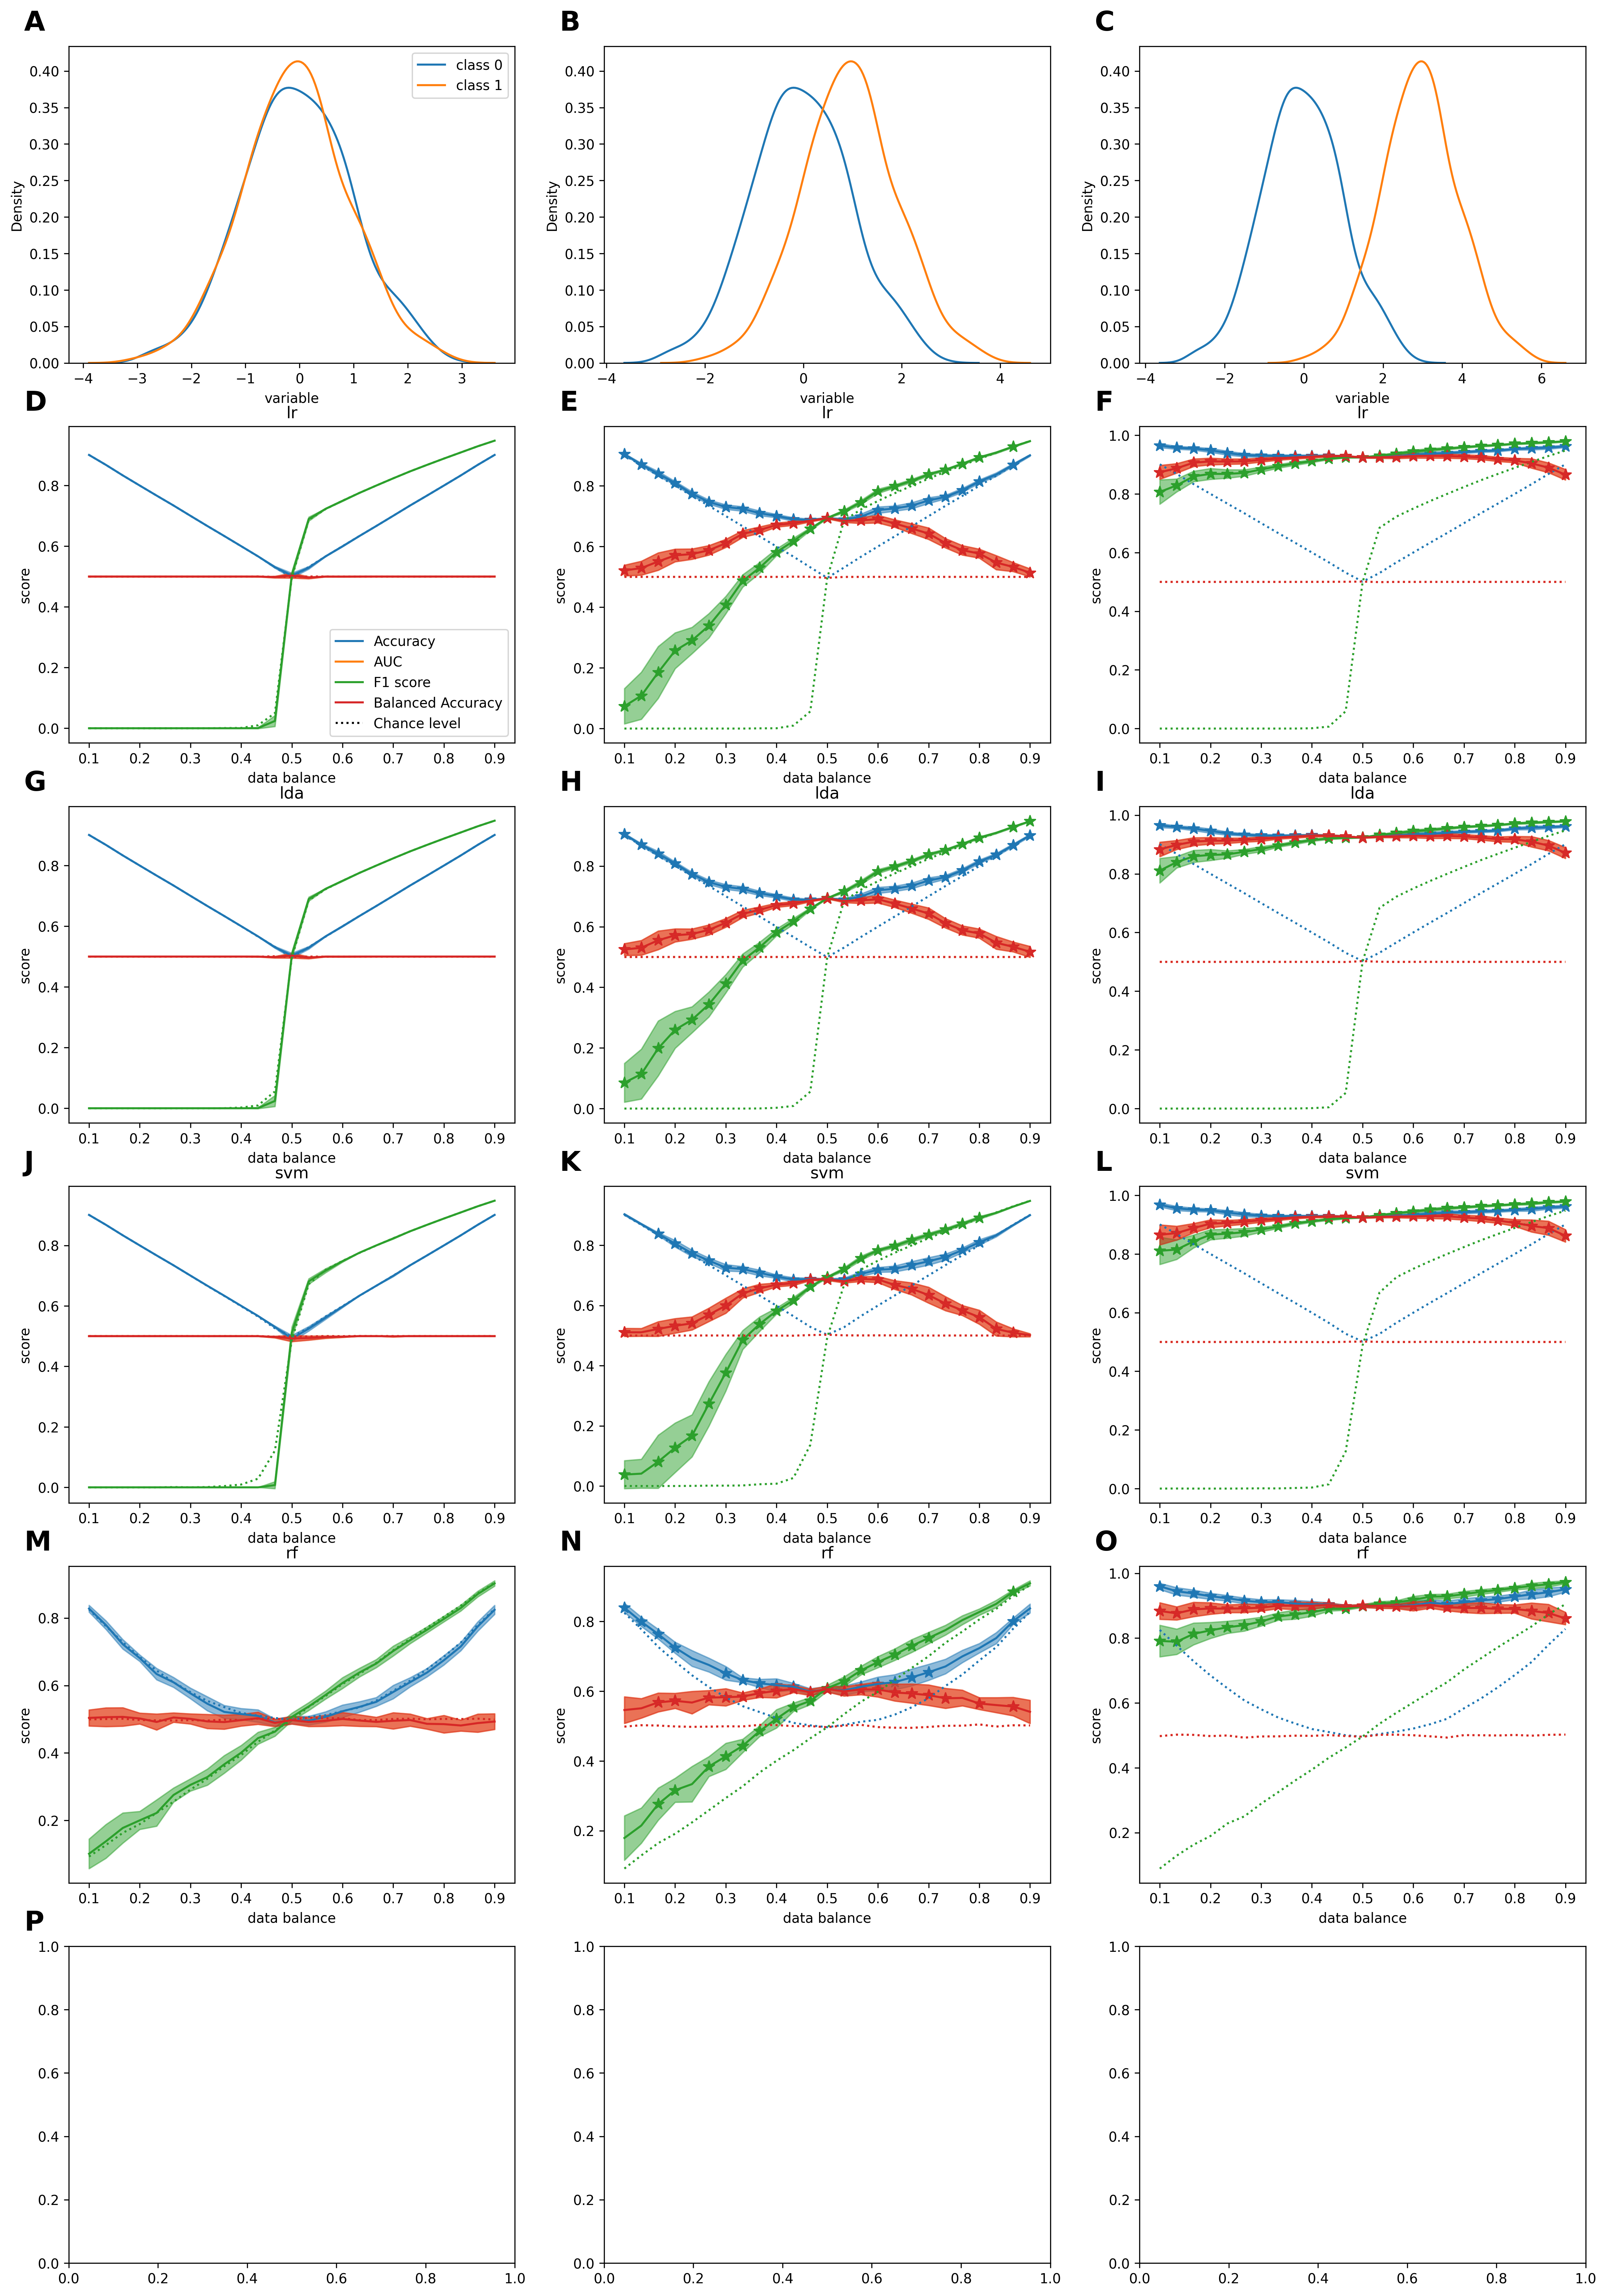

In [8]:
# visualize the result
fig, axes = plt.subplots(6, 3, figsize=(20, 30), dpi=300)
figtitle = "Synthetic data"
#fig.suptitle(figtitle, fontsize=25)
classifiers=["lr", "lda", "svm", "rf"]

show_leg_distrib=True
show_leg_metric=True
for ax_idx,ax in enumerate(axes.flat):
    ax.text(-0.1, 1.05, string.ascii_uppercase[ax_idx], transform=ax.transAxes, 
            size=20, weight='bold')
    if ax_idx in [0,1,2]:
        data_distribution(pls[ax_idx], ax=ax, show=False, show_leg=show_leg_distrib)
        show_leg_distrib=False
    elif ax_idx < 15:
        metric_balance(pls[ax_idx%3], ax=ax, show=False, classifier=classifiers[(ax_idx-3)//3], show_leg=show_leg_metric)
        show_leg_metric = False
    elif ax_idx == 15:
        plot_different_n(pl_nsamples, ax=ax, show=False, classifier="svm", show_leg=True, metric="accuracy")
    elif ax_idx == 16:
        plot_different_cvs(pls_crossvals, ax=ax, show=False, classifier="svm", show_leg=True, metric="accuracy")

## Task 2 : EEG analysis

In [ ]:
#pipeline_path="../imbalance/data/eeg.pickle"
features_path ="../imbalance/data/eeg_features.npy"

# load or generate dataset
if not os.path.isfile(features_path):
    x, y, groups = eegbci('../imbalance/data',roi=lambda x: x[0] in ['P','O'])
    np.save(features_path,dict(x=x, y=y, groups=groups))
else:
    features = np.load(features_path,allow_pickle=True).item()
    x, y, groups = features["x"] , features["y"] , features["groups"]

In [ ]:
pl = Pipeline(
    x,
    y,
    groups,
    dataset_balance=np.linspace(0.1, 0.9, 25),
    classifiers=["lda","svm","lr"],
    metrics=[ "roc_auc","accuracy", "f1", "balanced_accuracy"],
)
# fit and evaluate classifiers on dataset configurations
pl.evaluate()

In [ ]:
# visualize the result
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
figtitle = "EEG data"
#fig.suptitle(figtitle, fontsize=25)
classifiers=["lr", "lda", "svm", "rf"]

for ax_idx,ax in enumerate(axes.flat):
    ax.text(-0.1, 1.05, string.ascii_uppercase[ax_idx], transform=ax.transAxes, 
            size=20, weight='bold')
    if ax_idx == 0:
        data_distribution(pl, ax=ax, show=False)
    elif ax_idx < 6:
        metric_balance(pl, ax=ax, show=False, classifier=classifiers[ax_idx-1])

## Task 3 : MEG 1

In [ ]:
# visualize the result
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
figtitle = "MEG CAMCAN data"
#fig.suptitle(figtitle, fontsize=25)
classifiers=["lr", "lda", "svm", "rf"]

for ax_idx,ax in enumerate(axes.flat):
    ax.text(-0.1, 1.05, string.ascii_uppercase[ax_idx], transform=ax.transAxes, 
            size=20, weight='bold')
    if ax_idx == 0:
        data_distribution(pl, ax=ax, show=False)
    elif ax_idx < 5:
        metric_balance(pl, ax=ax, show=False, classifier="svm")

## Task 4 : MEG 2

In [ ]:
# generate random data
x, y, groups = gaussian_binary(n_samples_per_class=1500, n_groups=5, mean_distance=1)
# run the pipeline
pl_nsamples = Pipeline(
    x,
    y,
    groups,
    dataset_balance=np.linspace(0.1, 0.9, 25),
    classifiers=["svm"],# "rf"],
    metrics=["roc_auc", "accuracy", "f1", "balanced_accuracy"],
    n_permutations=0,
    n_init=1,
    dataset_size=(0.1, 0.33, 1)
)
pl_nsamples.evaluate()



fitting classifiers:   0%|                                                                     | 0/75 [00:00<?, ?it/s]

fitting classifiers:   0%|                              | 0/75 [00:00<?, ?it/s, size=0.1, balance=0.1, classifier=SVC]

ERROR! Session/line number was not unique in database. History logging moved to new session 897


fitting classifiers:   0%|                              | 0/75 [00:30<?, ?it/s, size=0.1, balance=0.1, classifier=SVC]


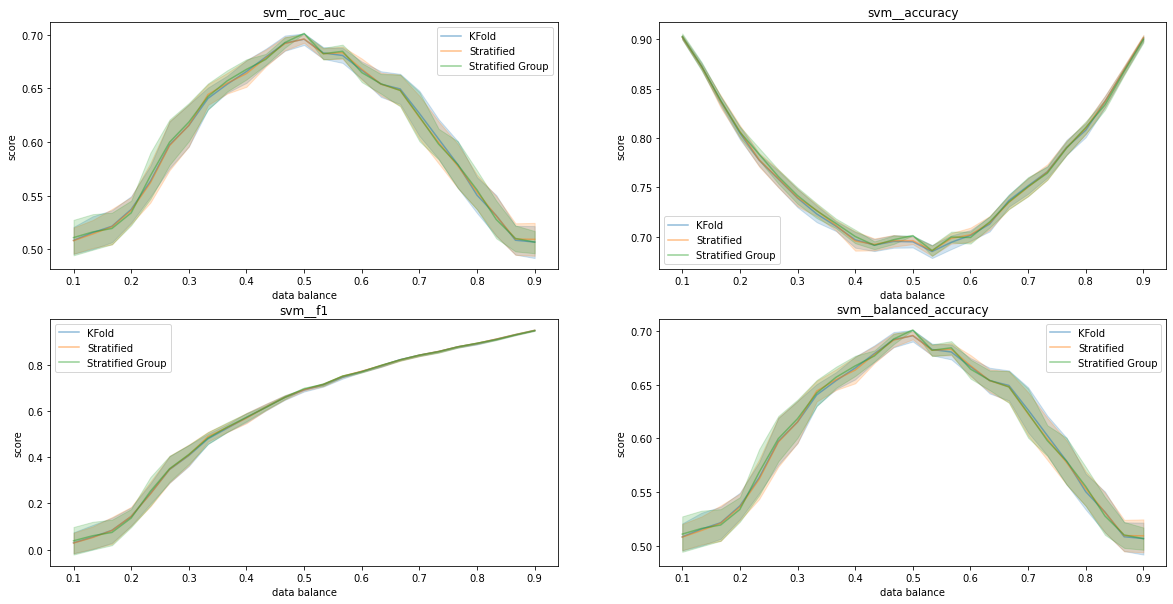

In [3]:
metrics=[ "roc_auc","accuracy", "f1", "balanced_accuracy"]
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

for ax_idx,ax in enumerate(axes.flat):
    plot_different_cvs(pls_crossvals, ax=ax, show=False, classifier="svm", show_leg=True, metric=metrics[ax_idx])